# Credit Card Default Prediction

In this notebook, we'll analyze a dataset on credit card default payments from clients in Taiwan, aiming to predict the probability of default using various machine learning models. Our goal is to build a predictive model that can estimate the likelihood of default, which is crucial for risk management in the financial sector. We'll employ a step-by-step approach, starting with exploratory data analysis (EDA) and data preprocessing, and finally, we'll choose the best-performing models from a pool of thirty using the `LazyClassifier` library.

## Steps to be Taken

### 1. Exploratory Data Analysis (EDA)
- **Objective:** Understand the structure and characteristics of the dataset.
- **Actions:** 
  - Examine the distribution of key variables.
  - Identify any patterns, correlations, or anomalies in the data.
  - Visualize relationships between features and the target variable (default or no default).

### 2. Data Preprocessing
- **Objective:** Prepare the dataset for modeling.
- **Actions:**
  - Handle missing values, if any.
  - Encode categorical variables.
  - Scale or normalize features as required.
  - Split the data into training and testing sets.

### 3. Model Selection Using LazyClassifier
- **Objective:** Select and evaluate machine learning models.
- **Actions:**
  - Utilize the `LazyClassifier` library to automatically run and evaluate thirty different models on the dataset.
  - Compare models based on accuracy, precision, recall, and other relevant metrics.
  - Identify the top-performing models for further analysis.

## Dataset Information
The dataset comprises records on default payments, demographic factors, credit data, payment history, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. This data is crucial for building credit scoring models and performing exploratory data analysis related to credit risk.


### Variables  
ID: Client ID (Index)   
LIMIT_BAL: Amount of given credit (NT dollar)   
SEX: Gender (male; female)  
EDUCATION: Education level (graduate school; university; high school; others)  
MARRIAGE: Marital status (married; single; others)  
AGE: Age in years  
PAY_0: Repayment status in September 2005 (-2 = no consumption; -1 = pay duly; 0 = the use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; and so on)  
PAY_2: Repayment status in August 2005 (same scale as above)  
PAY_3: Repayment status in July 2005 (same scale as above)  
PAY_4: Repayment status in June 2005 (same scale as above)  
PAY_5: Repayment status in May 2005 (same scale as above)  
PAY_6: Repayment status in April 2005 (same scale as above)  
BILL_AMT1: Amount of bill statement in September 2005 (NT dollar)   
BILL_AMT2: Amount of bill statement in August 2005 (NT dollar)  
BILL_AMT3: Amount of bill statement in July 2005 (NT dollar)  
BILL_AMT4: Amount of bill statement in June 2005 (NT dollar)  
BILL_AMT5: Amount of bill statement in May 2005 (NT dollar)  
BILL_AMT6: Amount of bill statement in April 2005 (NT dollar)  
PAY_AMT1: Amount paid in September 2005 (NT dollar)   
PAY_AMT2: Amount paid in August 2005 (NT dollar)  
PAY_AMT3: Amount paid in July 2005 (NT dollar)  
PAY_AMT4: Amount paid in June 2005 (NT dollar)  
PAY_AMT5: Amount paid in May 2005 (NT dollar)  
PAY_AMT6: Amount paid in April 2005 (NT dollar)  
default_payment_next_month: Default payment (1 = yes; 0 = no)  

### Useful links and Data source

[UCI](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

[Kaggle](https://www.kaggle.com/datasets/farahananda/credit-card-clients-data)

## Import libraries, Read Data and Get General info from the data

In [19]:
#To start, import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

sns.set_style("whitegrid")

In [20]:
# Read data 
df = pd.read_csv(r'cleaned_credit_card_data.csv')
df.head()

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
0   1      20000  female  university  married   24      2      2     -1  \
1   2     120000  female  university   single   26     -1      2      0   
2   3      90000  female  university   single   34      0      0      0   
3   4      50000  female  university  married   37      0      0      0   
4   5      50000    male  university  married   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
0     -1  ...        0.0        0.0        0.0       0.0     689.0         0  \
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0      1000   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0      1000   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0      1200   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [21]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [22]:
# This is preference to use lower case column names 
df.columns = df.columns.str.lower()

In [23]:
# get basic statistics from the data
df.describe().transpose()

count           mean            std       min   
id                          30000.0   15000.500000    8660.398374      1.00  \
limit_bal                   30000.0  166808.656000  127584.472995  10000.00   
age                         30000.0      35.447167       9.090242     22.00   
pay_0                       30000.0      -0.016700       1.123802     -2.00   
pay_2                       30000.0      -0.133767       1.197186     -2.00   
pay_3                       30000.0      -0.166200       1.196868     -2.00   
pay_4                       30000.0      -0.220667       1.169139     -2.00   
pay_5                       30000.0      -0.266200       1.133187     -2.00   
pay_6                       30000.0      -0.291100       1.149988     -2.00   
bill_amt1                   30000.0   50423.283733   69304.686094    -81.00   
bill_amt2                   30000.0   48380.464567   66803.121894   -200.00   
bill_amt3                   30000.0   46174.230967   64352.130474   -200.00   
bill_amt4                   30000.0   42510.317067   60049.132356   -212.02   
bill_amt5                   30000.0   39581.215733   56585.314536   -232.01   
bill_amt6                   30000.0   38200.797233   55409.361537   -331.03   
pay_amt1                    30000.0    5029.561633    9430.870444      0.00   
pay_amt2                    30000.0    5088.719567   10341.622162      0.00   
pay_amt3                    30000.0    4555.447400    9560.267421      0.00   
pay_amt4                    30000.0    4246.447100    9272.507135      0.00   
pay_amt5                    30000.0    4200.113300    9063.279373      0.00   
pay_amt6                    30000.0    4553.894133   11039.458690      0.00   
default_payment_next_month  30000.0       0.221200       0.415062      0.00   

                                 25%       50%        75%        max  
id                           7500.75   15000.5   22500.25   30000.00  
limit_bal                   50000.00  140000.0  240000.00  500000.00  
age                            28.00      34.0      41.00      60.00  
pay_0                          -1.00       0.0       0.00       8.00  
pay_2                          -1.00       0.0       0.00       8.00  
pay_3                          -1.00       0.0       0.00       8.00  
pay_4                          -1.00       0.0       0.00       8.00  
pay_5                          -1.00       0.0       0.00       8.00  
pay_6                          -1.00       0.0       0.00       8.00  
bill_amt1                    3558.75   22381.5   67091.00  350110.68  
bill_amt2                    2984.75   21200.0   64006.25  337495.28  
bill_amt3                    2666.25   20088.5   60164.75  325030.39  
bill_amt4                    2326.75   19052.0   54506.00  304997.27  
bill_amt5                    1763.00   18104.5   50190.50  285868.33  
bill_amt6                    1256.00   17071.0   49198.25  279505.06  
pay_amt1                     1000.00    2100.0    5006.00   66522.18  
pay_amt2                      833.00    2009.0    5000.00   76651.02  
pay_amt3                      390.00    1800.0    4505.00   70000.00  
pay_amt4                      296.00    1500.0    4013.25   67054.44  
pay_amt5                      252.50    1500.0    4031.50   65607.56  
pay_amt6                      117.75    1500.0    4000.00   82619.05  
default_payment_next_month      0.00       0.0       0.00       1.00

In [24]:
# check for null values for each column
df.isnull().sum()

id                            0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default_payment_next_month    0
dtype: int64

In [25]:
# Checking for any duplicates 
df.duplicated().sum()

0

## Plot for distributions (EDA)

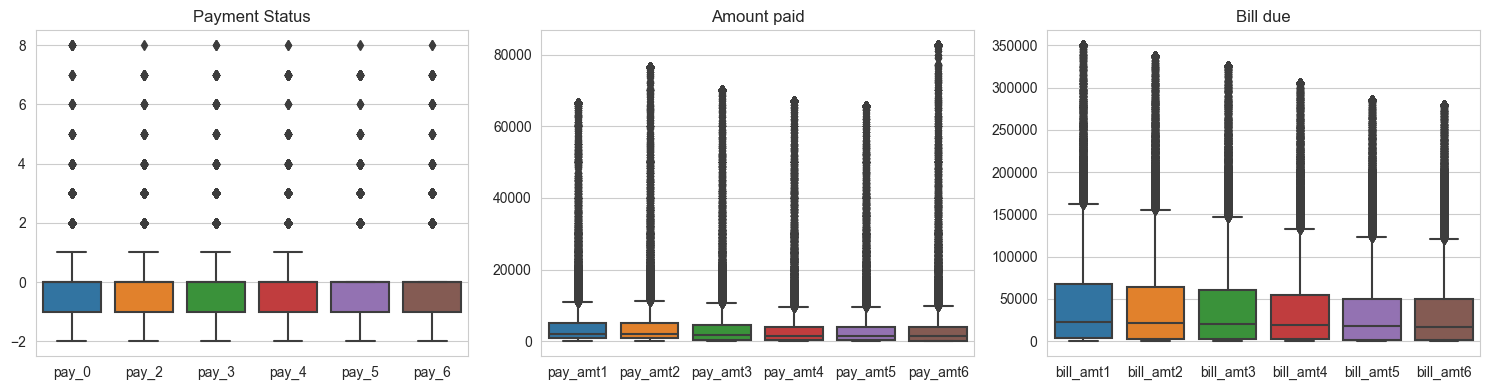

In [26]:
# plot boxplots and check for distribution of the amount transacted 
fig,axs = plt.subplots(ncols= 3, figsize = (15,4))

sns.boxplot(df[df.columns[df.columns.str.contains('pay_\d+')]],ax=axs[0]).set_title("Payment Status")
sns.boxplot(df[df.columns[df.columns.str.contains('pay_amt\d+')]],ax=axs[1]).set_title("Amount paid")
sns.boxplot(df[df.columns[df.columns.str.contains('bill_amt\d+')]],ax=axs[2]).set_title("Bill due")

plt.tight_layout()

 * These visualizations provide a quick insight into the distribution of key variables in the dataset. The presence of outliers and the skewed distributions in the "Amount Paid" and "Bill Due" categories suggest variability in client behavior and financial status. This variability will need to be considered during preprocessing, possibly by normalizing the data or handling the outliers, and it will also impact the machine learning models' performance in predicting defaults.

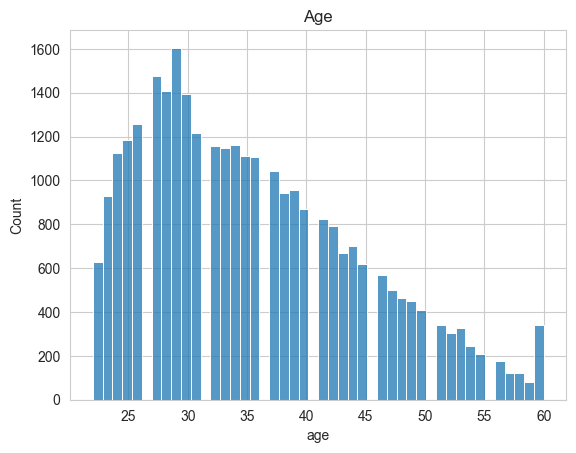

In [27]:
# check for age distribution
sns.histplot(data=df,x=df['age']).set_title('Age')
plt.show()

 * The age distribution is skewed towards younger clients, with the majority of clients falling within the age range of 25 to 40.There is a peak around the ages of 29 to 30, indicating that this age group is the most common among the clients.

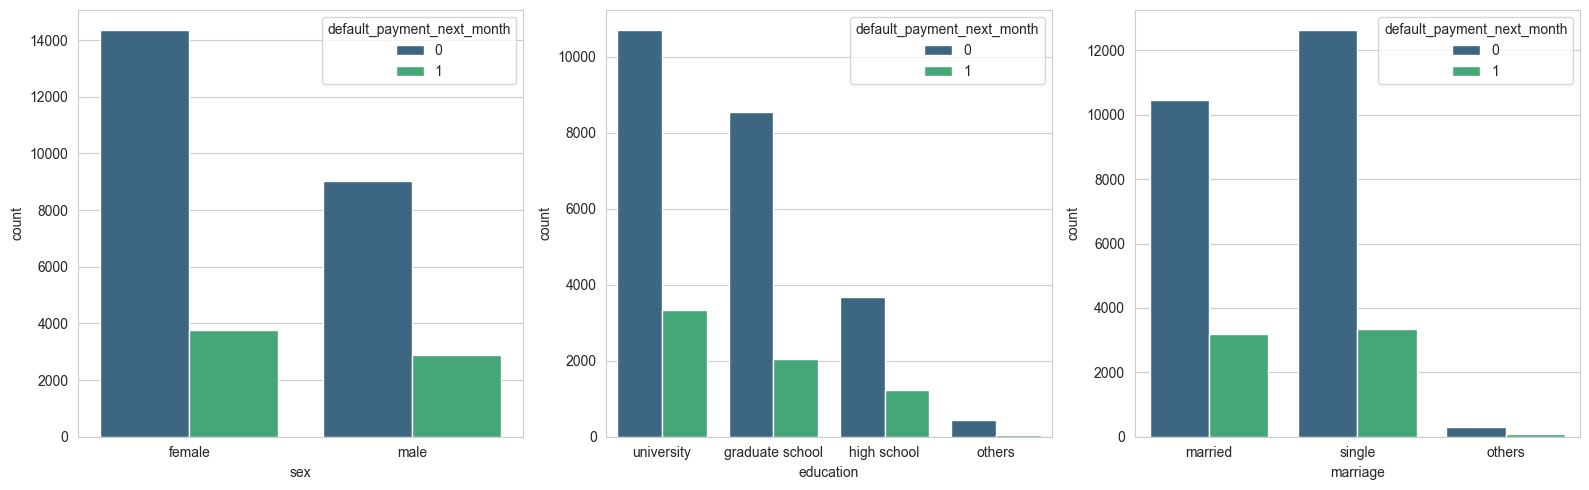

In [28]:
fig,axs = plt.subplots(ncols=3,figsize=(16,5))

for n, i in enumerate(df[['sex', 'education', 'marriage']].columns):
    sns.countplot( data=df[['sex', 'education', 'marriage']],x=df[i],hue =df['default_payment_next_month'],ax= axs[n],palette = 'viridis')

plt.tight_layout()

**Gender vs. Default Payment Next Month** : This bar chart compares the number of male and female clients who either defaulted (1) or did not default (0) on their payment.   
- A higher number of female clients are represented in the dataset compared to male clients.
- Both genders show a higher proportion of non-defaulters compared to defaulters, but the gap between defaulters and non-defaulters appears to be slightly narrower for male clients than for female clients.    

**Education vs. Default Payment Next Month** : This bar chart displays the distribution of default and non-default payments based on clients' education levels (University, Graduate School, High School, and Others)   

- Majority of clients have a university or graduate school education.
- There is a higher proportion of non-defaulters across all education levels.
- Clients with a university education have a larger proportion of defaulters compared to those with a graduate school education.   

**Marriage Status vs. Default Payment Next Month** : This bar chart shows the relationship between marital status (Married, Single, Others) and default payment.  
- Married clients form the largest group, followed by single clients.
- Similar to the other charts, non-defaulters outnumber defaulters across all marital statuses.
- The proportion of defaulters is higher among single clients compared to married clients.

In [29]:
# Calculate Outstanding balances 
for i in range(1,7):
    bill_col = 'bill_amt{}'.format(i)
    pay_col = 'pay_amt{}'.format(i)
    if bill_col in df.columns and pay_col in df.columns:
        
        #finally deducting paymmet column from the bill columns  
        df['diff_amount{}'.format(i)] = df[bill_col] - df[pay_col]


In [30]:
# Calculate Payment Ratio

for i in range(1,7):
    bill_col = 'bill_amt{}'.format(i)
    pay_col = 'pay_amt{}'.format(i)

    if bill_col in df.columns and pay_col in df.columns:
        df['pay_ratio{}'.format(i)] = (df[pay_col]/df[bill_col]).round(4)
        
        # fill any nulls with 0 as well as replacing any infinite number with a 0
        df['pay_ratio{}'.format(i)].fillna(0,inplace=True) 
        df['pay_ratio{}'.format(i)].replace([np.inf,-np.inf],0,inplace=True)

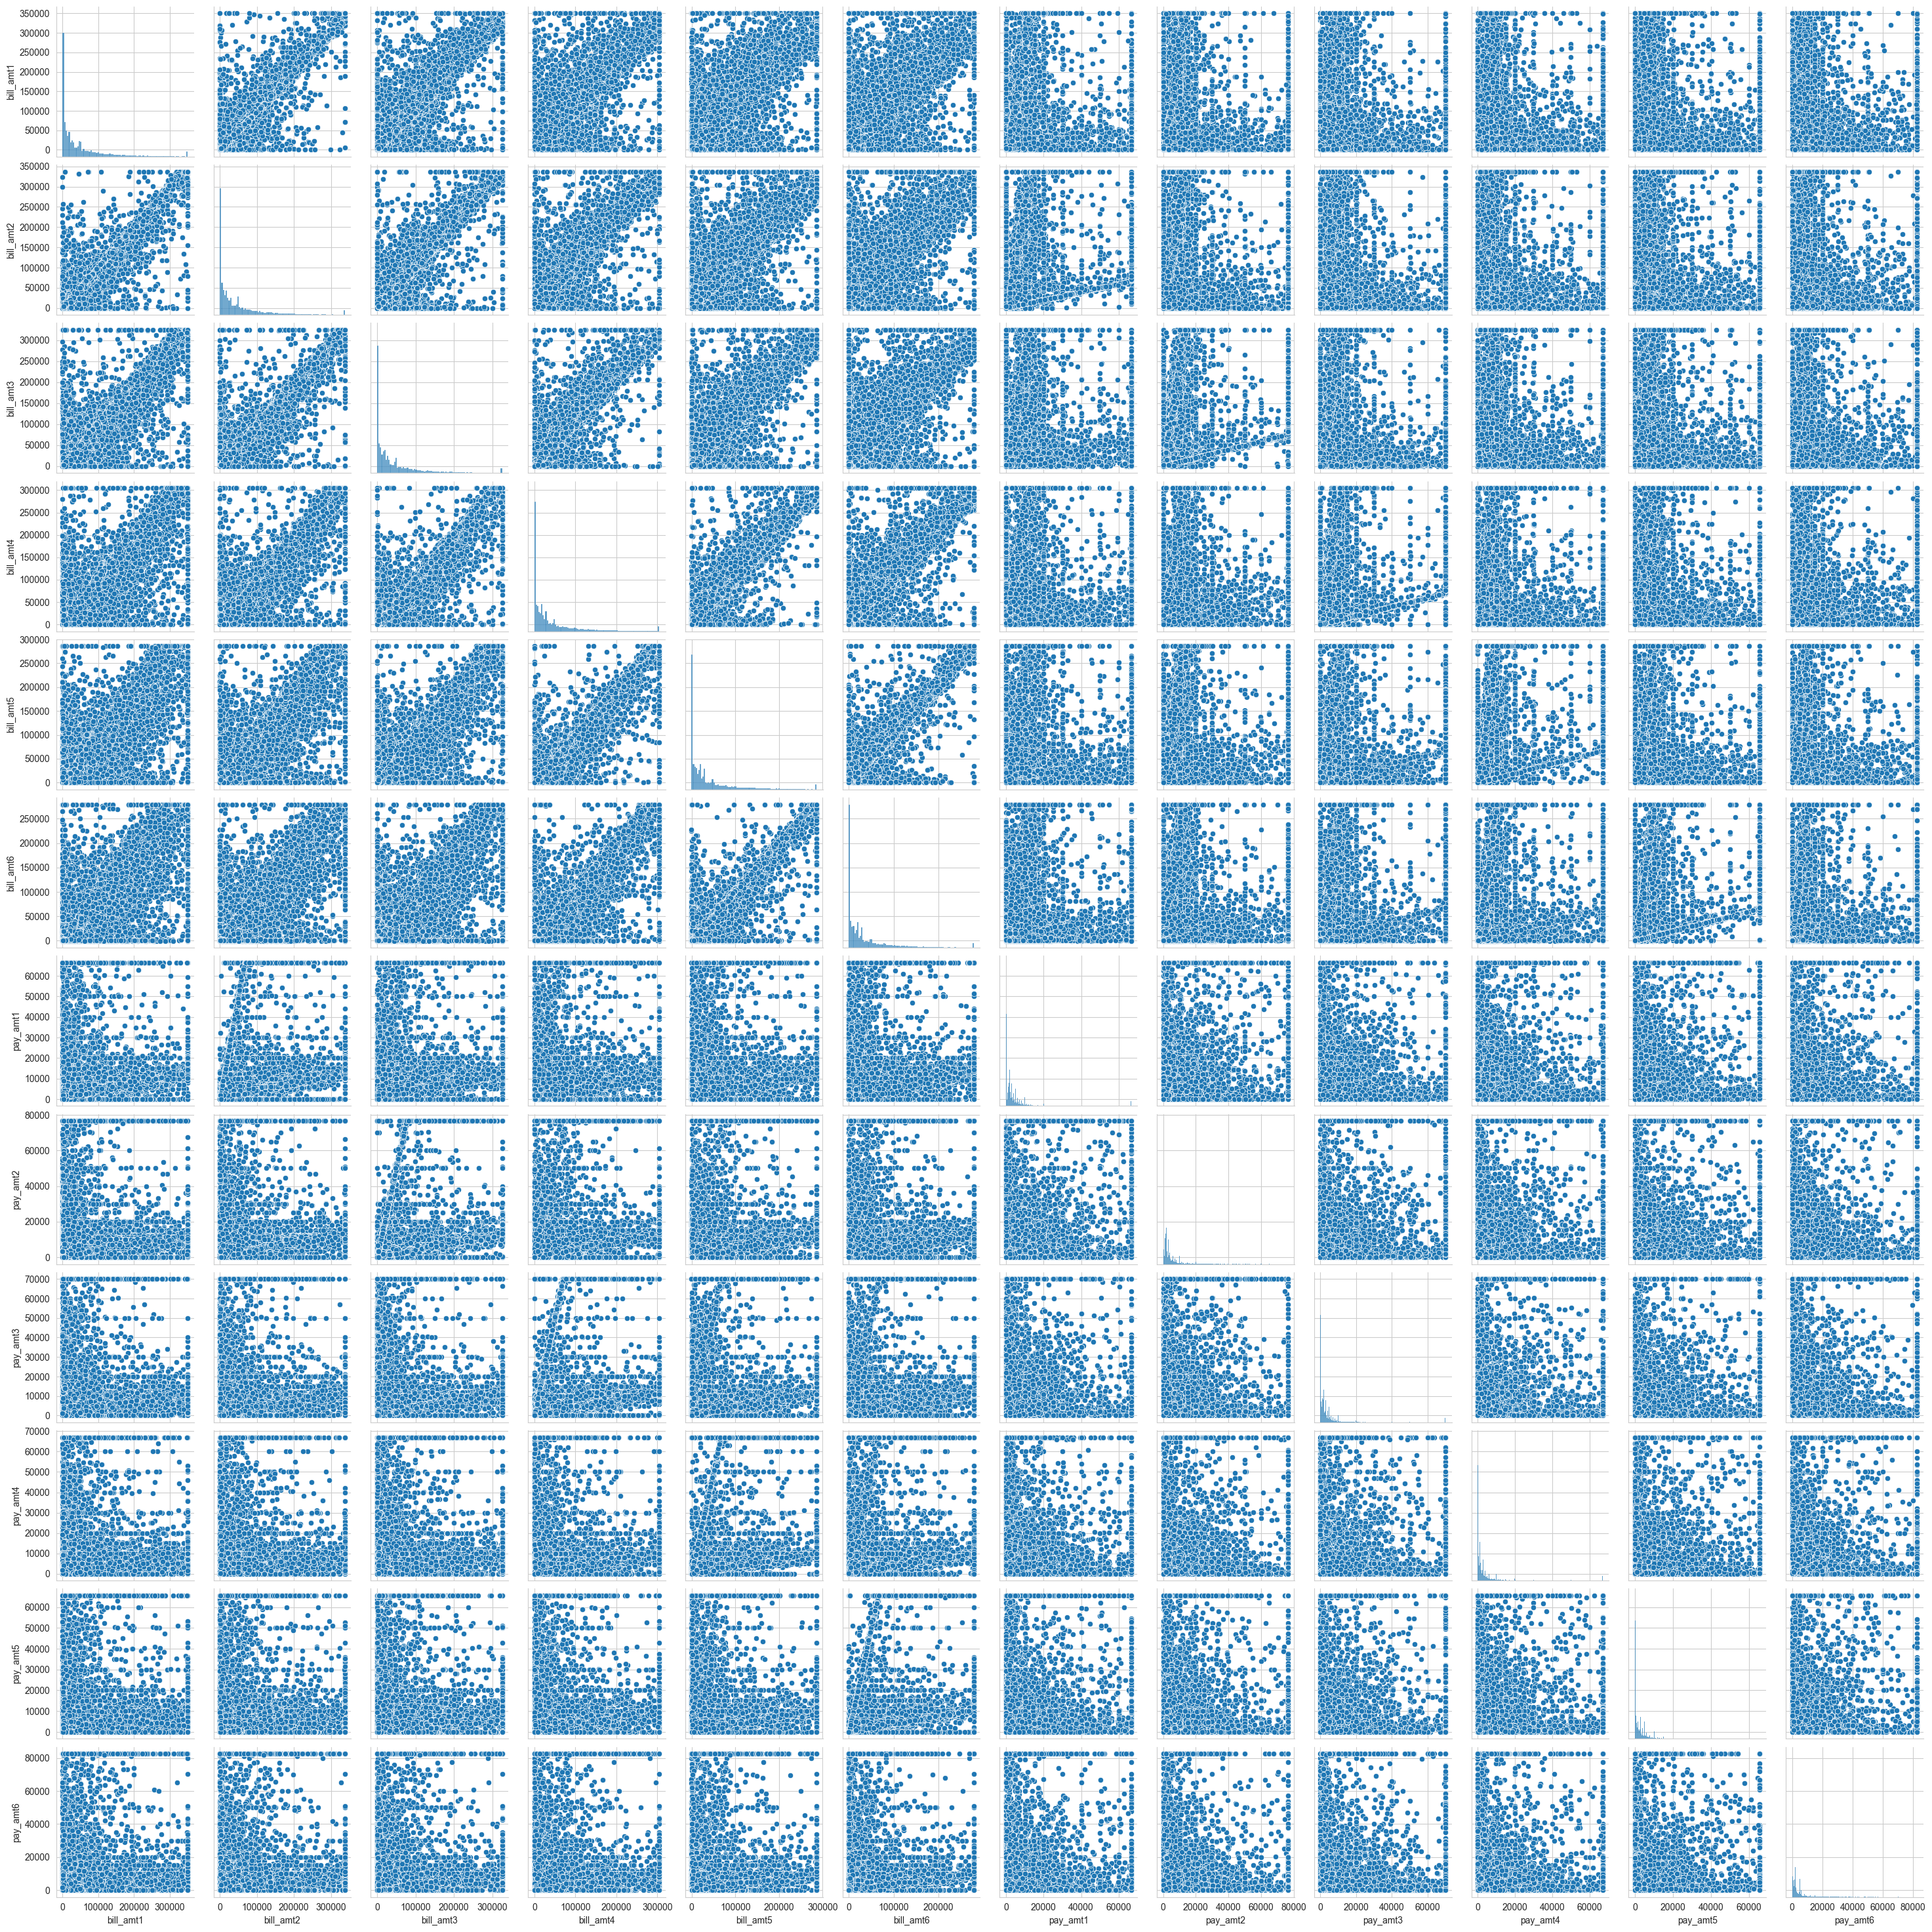

In [31]:
# plot a pair plots 
sns.pairplot(df[df.columns[df.columns.str.contains('amt')]])

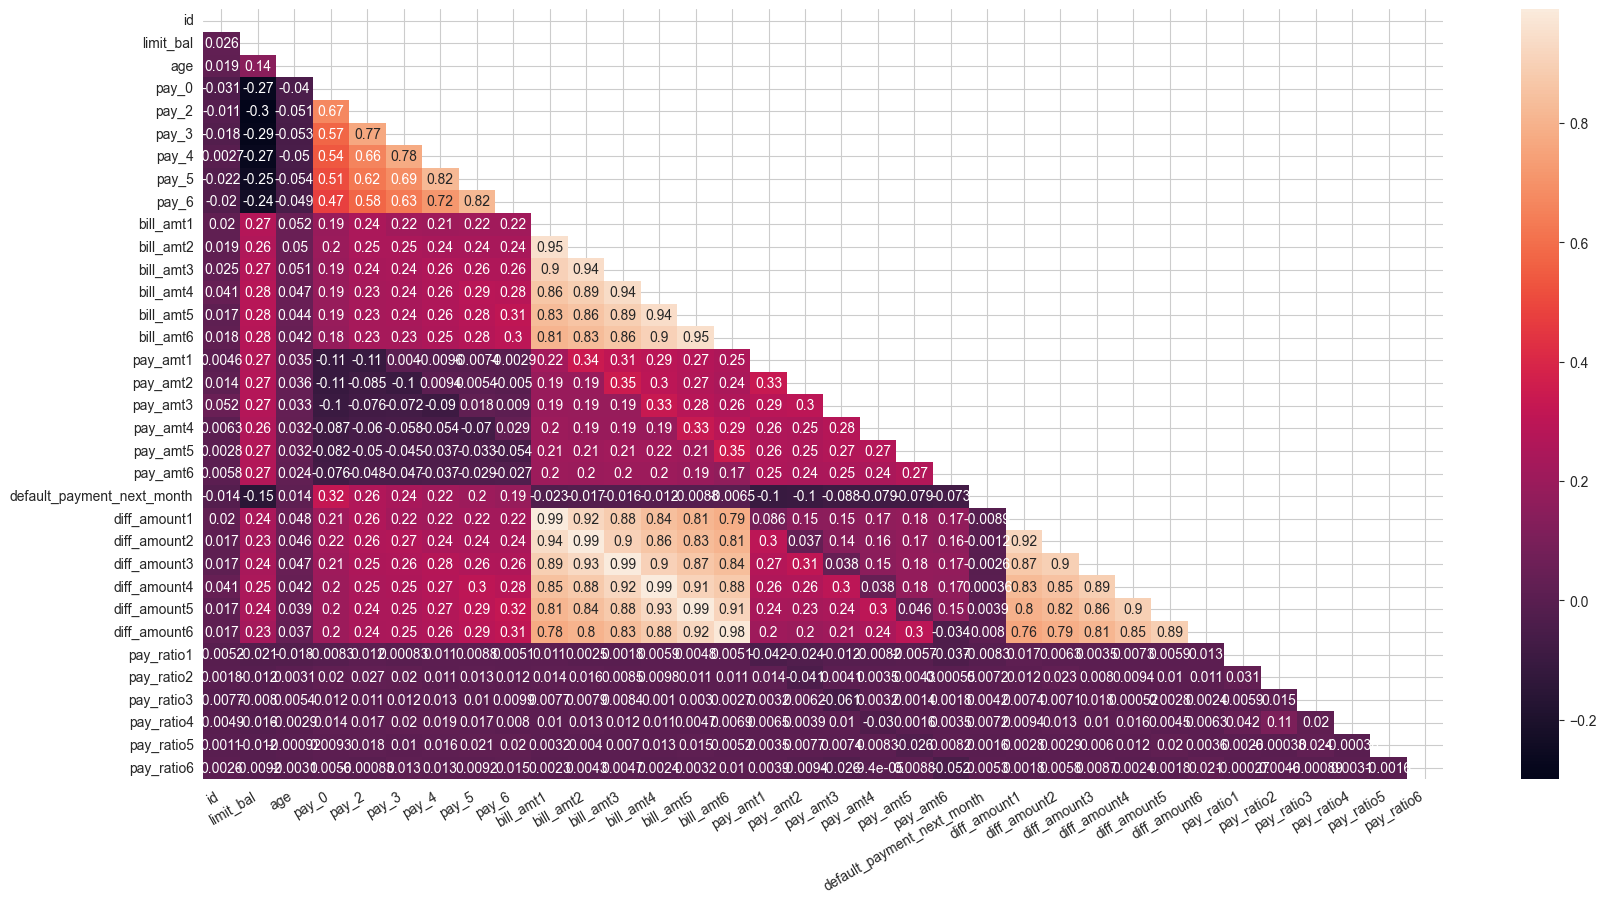

In [32]:
# Correlation matrix

# Create a mask to hide the upper triangle of the correlation matrix (as it's symmetric)
mask = np.zeros_like(df.corr(numeric_only=True))

# Set the mask values for the upper triangle to True (hides them)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("whitegrid"):

    f, ax = plt.subplots(figsize=(20,10))

    # Generate a heatmap for the correlation matrix, applying the mask and enabling annotations
    ax = sns.heatmap(df.corr(numeric_only=True),mask=mask,annot=True)
    
     # Rotate the x-axis labels by 30 degrees for better readability
    plt.xticks(rotation=30, ha='right')

### Preprocessing

In [18]:
# Encoding categorical variables
# Define the OneHotEncoder and OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

ohe = OneHotEncoder(drop='first')
oe = OrdinalEncoder(categories=[['university', 'graduate school', 'high school', 'others']])


In [19]:
# Create the column transformer
column_trans = make_column_transformer(
    (ohe, ['sex', 'marriage']),
    (oe, ['education']),
    remainder='passthrough'
)

In [20]:
# Fit and transform the data
df_array = column_trans.fit_transform(df)

# Convert the result to a DataFrame for better readability
df = pd.DataFrame(df_array, columns=column_trans.get_feature_names_out())

df.columns= df.columns.str.replace("remainder__","")
df.columns = df.columns.str.replace("onehotencoder__","")
df.columns = df.columns.str.replace("ordinalencoder__","")
df.columns

Index(['sex_male', 'marriage_others', 'marriage_single', 'education', 'id',
       'limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default_payment_next_month',
       'diff_amount1', 'diff_amount2', 'diff_amount3', 'diff_amount4',
       'diff_amount5', 'diff_amount6', 'pay_ratio1', 'pay_ratio2',
       'pay_ratio3', 'pay_ratio4', 'pay_ratio5', 'pay_ratio6'],
      dtype='object')

### Split and Scale

In [27]:
X = df.drop(columns=['id','default_payment_next_month'], axis=1)
y = df['default_payment_next_month']

In [28]:
# RobustScaler uses the median and IQR, the scaling is not unduly influenced by extreme values.
# This makes it particularly useful in datasets where outliers are present but 
# should not dominate the scaling process.

from sklearn.preprocessing import RobustScaler

scaler =RobustScaler()

X = scaler.fit_transform(X)

X

array([[ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00, ...,
        -3.06948640e-01, -2.86886708e-01, -2.70343888e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.15508560e+00, -2.86886708e-01,  3.90602656e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.55387714e-01,  1.90544157e-01,  1.91964590e+00],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.31399799e+00,  4.06779661e-01,  8.19884236e-01],
       [ 1.00000000e+00,  0.00000000e+00, -1.00000000e+00, ...,
        -1.28902316e-02,  3.15967886e+01, -1.90670752e-02],
       [ 1.00000000e+00,  0.00000000e+00, -1.00000000e+00, ...,
        -8.62034240e-02, -6.70829616e-02,  1.74327545e-01]])

In [32]:
## split to training and validation sets at 30%  test set size

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

print(f"X_train: {X_train},\nX_test: {X_test},\ny_train: {y_train},\ny_test: {y_test}")

### Time to Train!

I'll use Lazy Classifier from Lazy Predict   

Lazy Predict is a convenient tool for quickly comparing the performance of multiple machine learning models on a given dataset. It's particularly useful in the early stages of a machine learning project for model selection, rapid prototyping, and establishing baseline performance metrics. While it’s not a replacement for thorough model tuning and customization, it provides a valuable starting point.
 

In [33]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [31]:
clf = LazyClassifier(ignore_warnings=True,verbose=0)

models,predictions = clf.fit(X_train,X_test,y_train,y_test)
models 

 97%|█████████▋| 28/29 [04:34<00:11, 11.46s/it]

[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6293
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193


100%|██████████| 29/29 [04:35<00:00,  9.49s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                           
LGBMClassifier                     0.82               0.66     0.66      0.80  \
RandomForestClassifier             0.81               0.65     0.65      0.79   
XGBClassifier                      0.81               0.65     0.65      0.79   
ExtraTreesClassifier               0.81               0.65     0.65      0.79   
NearestCentroid                    0.65               0.64     0.64      0.68   
SVC                                0.82               0.64     0.64      0.79   
AdaBoostClassifier                 0.82               0.63     0.63      0.79   
BaggingClassifier                  0.80               0.63     0.63      0.78   
PassiveAggressiveClassifier        0.72               0.63     0.63      0.73   
KNeighborsClassifier               0.79               0.63     0.63      0.77   
Perceptron                         0.68               0.62     0.62      0.70   
SGDClassifier                      0.81               0.62     0.62      0.78   
DecisionTreeClassifier             0.73               0.61     0.61      0.73   
LabelSpreading                     0.74               0.61     0.61      0.74   
LinearDiscriminantAnalysis         0.81               0.61     0.61      0.77   
LabelPropagation                   0.74               0.61     0.61      0.74   
ExtraTreeClassifier                0.71               0.60     0.60      0.72   
LogisticRegression                 0.81               0.60     0.60      0.77   
CalibratedClassifierCV             0.81               0.60     0.60      0.77   
QuadraticDiscriminantAnalysis      0.43               0.58     0.58      0.45   
BernoulliNB                        0.67               0.58     0.58      0.69   
LinearSVC                          0.80               0.57     0.57      0.75   
RidgeClassifierCV                  0.80               0.56     0.56      0.74   
RidgeClassifier                    0.80               0.56     0.56      0.74   
GaussianNB                         0.37               0.56     0.56      0.36   
DummyClassifier                    0.78               0.50     0.50      0.69   

                               Time Taken  
Model                                      
LGBMClassifier                       0.93  
RandomForestClassifier              19.10  
XGBClassifier                        0.87  
ExtraTreesClassifier                 6.71  
NearestCentroid                      0.16  
SVC                                 63.78  
AdaBoostClassifier                   5.93  
BaggingClassifier                   10.37  
PassiveAggressiveClassifier          0.15  
KNeighborsClassifier                 1.08  
Perceptron                           0.13  
SGDClassifier                        0.49  
DecisionTreeClassifier               1.46  
LabelSpreading                      77.72  
LinearDiscriminantAnalysis           0.30  
LabelPropagation                    45.05  
ExtraTreeClassifier                  0.13  
LogisticRegression                   0.21  
CalibratedClassifierCV              31.36  
QuadraticDiscriminantAnalysis        0.31  
BernoulliNB                          0.10  
LinearSVC                            8.39  
RidgeClassifierCV                    0.15  
RidgeClassifier                      0.11  
GaussianNB                           0.10  
DummyClassifier                      0.08

## Last but not Least

**Recommendation**   
According to the analysis and evaluation of models, LGBMClassifier is recommended for predicting credit card defaults, and this model gave the highest accuracy at 82% and F1 score at 80%, with runtime that is efficient in less than 1 second. The LightGBM model is much superior in points of accuracy and computational efficiency, so it is very suitable for a real-time credit scoring application, especially in areas that require speed in making decisions.

**Conclusion**   
In credit card default prediction, selection of the right model is important for accuracy in risk assessment and for making proper credit management decisions. Among the models assessed based on their performance, the LGBMClassifier stands out and is balanced, hence it will be the best candidate. Using this model will significantly improve the ability to predict defaults and thereby help in better credit risk management to reduce possible financial losses.